In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [25]:
# 데이터셋 인스턴스 생성

df = pd.read_csv('/content/drive/MyDrive/boston.csv')  # CSV 파일 경로

In [26]:
# 데이터와 타겟 분리
X = df.drop(columns=["PRICE"])
y = df["PRICE"]

In [27]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

선형회귀 평균제곱근오차 0.55468870444514


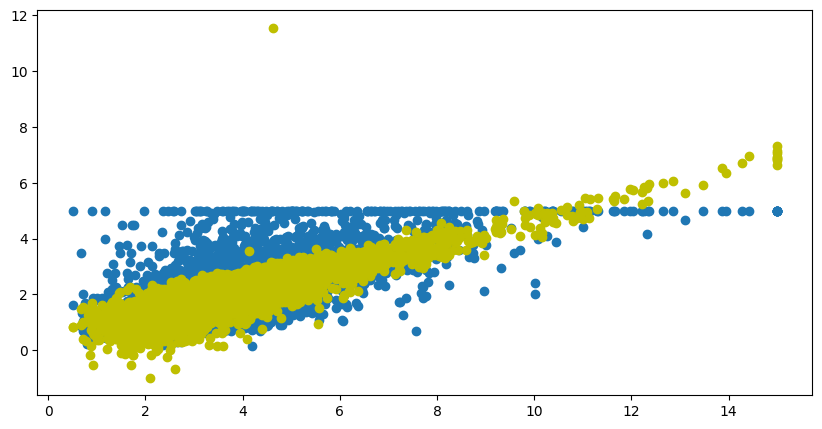

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('선형회귀 평균제곱근오차', mean_squared_error(ly_preds, y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ly_preds, c='y', label='ly_preds')
plt.show()

의사결정트리 평균제곱근오차 0.4813863992678537


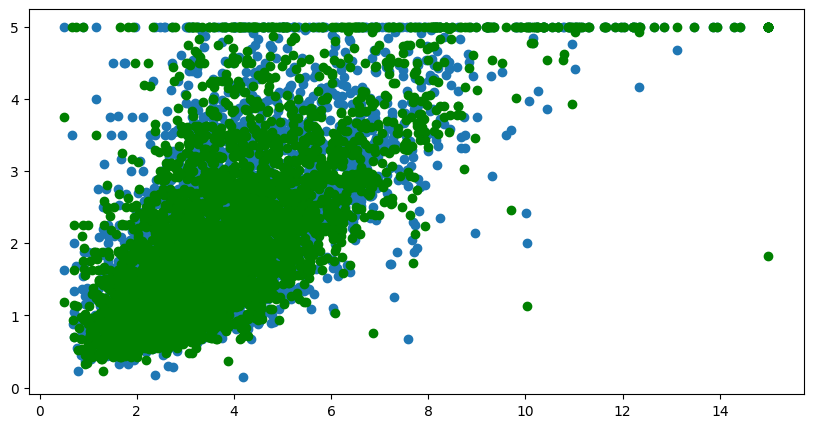

In [29]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
dy_preds = model.predict(X_test)
print('의사결정트리 평균제곱근오차', mean_squared_error(dy_preds, y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], dy_preds, c='g', label='dy_preds')
plt.show()

랜덤포레스트 평균제곱근오차 0.2383720307319692


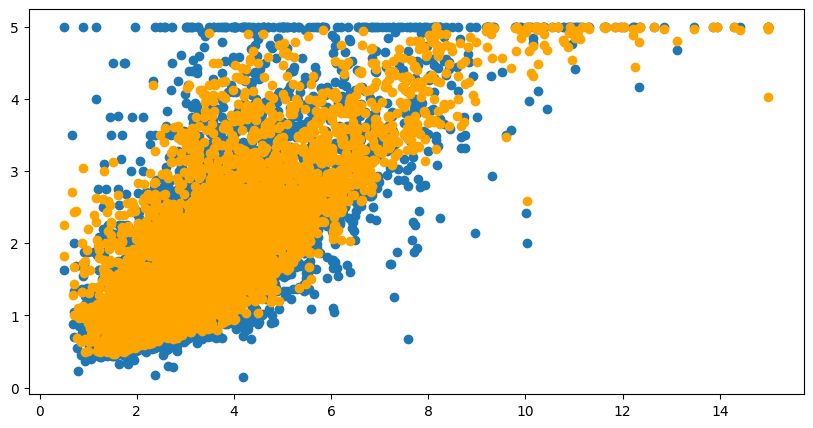

In [30]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('랜덤포레스트 평균제곱근오차', mean_squared_error(ry_preds, y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ry_preds, c='orange', label='ry_preds')
plt.show()

In [31]:
print("입력 특징")
print(X)
print("정답 라벨")
print(y)

입력 특징
       Unnamed: 0  MedInc  HouseAge  AveRooms  AveBedrms  Population  \
0               0  8.3252      41.0  6.984127   1.023810       322.0   
1               1  8.3014      21.0  6.238137   0.971880      2401.0   
2               2  7.2574      52.0  8.288136   1.073446       496.0   
3               3  5.6431      52.0  5.817352   1.073059       558.0   
4               4  3.8462      52.0  6.281853   1.081081       565.0   
...           ...     ...       ...       ...        ...         ...   
20635       20635  1.5603      25.0  5.045455   1.133333       845.0   
20636       20636  2.5568      18.0  6.114035   1.315789       356.0   
20637       20637  1.7000      17.0  5.205543   1.120092      1007.0   
20638       20638  1.8672      18.0  5.329513   1.171920       741.0   
20639       20639  2.3886      16.0  5.254717   1.162264      1387.0   

       AveOccup  Latitude  Longitude  
0      2.555556     37.88    -122.23  
1      2.109842     37.86    -122.22  
2      2.802